In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [97]:
### Samples as of 2/19/19
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')
zoo_30 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_30_latest.csv')

slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Bolton_2008_gradeA_lenses.csv')
s4tm = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/S4TM_Shu_2017_gradaA_lenses.csv')
bells = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/Brownstein_BELLS_GradeA_lenses.csv')

decals_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/decals_gama.csv')
s4tm_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/s4tm_gama.csv')
slacs_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_gama.csv')

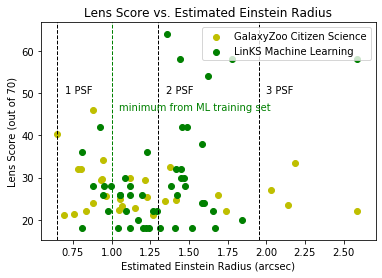

In [15]:
plt.scatter(zoo.theta_e_Ang_slide, zoo.LENS_SCORE*70,color='y',label='GalaxyZoo Citizen Science')
plt.scatter(mac.theta_e_Ang_slide, mac.SCORE,color='g',label='LinKS Machine Learning')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
plt.text(1.05, 46, 'minimum from ML training set', color = 'g')
plt.title('Lens Score vs. Estimated Einstein Radius')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score (out of 70)")
plt.legend(loc='upper right')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/mac_zoo_theta_e_score.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/mac_zoo_theta_e_score.pdf')

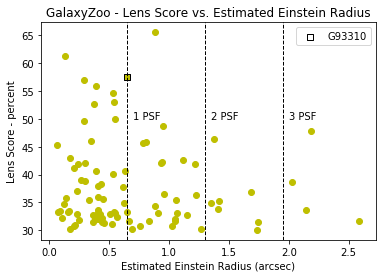

In [101]:
plt.scatter(zoo_30.theta_e_Ang_slide, zoo_30.LENS_SCORE * 100,color='Y')#,label='Zoo')
plt.scatter(zoo_30[zoo_30.GAMA_ID == 93310].theta_e_Ang_slide, 
            zoo_30[zoo_30.GAMA_ID == 93310].LENS_SCORE * 100, 
            marker = 's', color = 'none', edgecolor = 'k',
        label = 'G93310')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.7, 50, '1 PSF')
plt.text(1.35, 50, '2 PSF')
plt.text(2, 50, '3 PSF')
#plt.text(1.05, , 'minimum from training set', color = 'g')
plt.title('GalaxyZoo - Lens Score vs. Estimated Einstein Radius')
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Lens Score - percent")
plt.legend()
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/zoo_theta_e_score_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/zoo_theta_e_score.pdf')

Text(2, 20, '3 PSF')

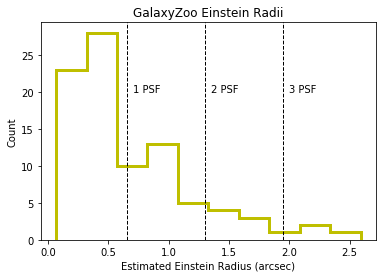

In [36]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("GalaxyZoo Einstein Radii")
plt.hist(zoo_30.theta_e_Ang_slide,bins=10,color='y',label='GZ', histtype = 'step', linewidth=3)
#plt.hist(s4tm_shu_17.theta_e_sie,bins=10,color='c',label='S4TM', histtype = 'step', linewidth=3)
#plt.hist(bells_brownstein_12.theta_e_sie,bins=10,color='k',label='BELLS', histtype = 'step', linewidth=3)
#plt.hist(spec_121519.theta_e_chabrier,bins=10,color='b',label='GAMA', histtype = 'step', linewidth=3)
#plt.legend(loc='upper right')
plt.axvline(0.65, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.3, color='k', linestyle='dashed', linewidth=1)
plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
plt.text(0.7, 20, '1 PSF')
plt.text(1.35, 20, '2 PSF')
plt.text(2, 20, '3 PSF')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/gz_theta_e.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/gz_theta_e.pdf')



Text(0.5, 1.0, 'Redshift, Stellar Mass, and Einstein Radius')

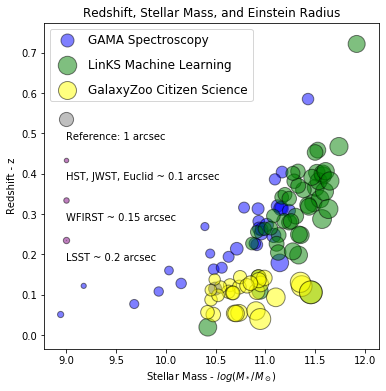

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = np.log10(spec.STELLAR_MASS)
y1 = spec.z_lens
c = spec.theta_e_Ang_slide
v1 = spec.theta_e_Ang_slide*200

x2 = np.log10(mac.STELLAR_MASS)
y2 = mac.Z
v2 = mac.theta_e_Ang_slide*200

x3 = np.log10(zoo.STELLAR_MASS)
y3 = zoo.Z
v3 = zoo.theta_e_Ang_slide*200

jwst = 0.1*200
lsst = 0.2*200
wfirst = 0.15*200
hst = 0.05

ax.scatter(x1, y1, s=v1, color='blue', marker='o', edgecolors = "k", label='GAMA Spectroscopy', alpha = 0.5)#, fillstyle = 'none')
ax.scatter(x2, y2, s=v2, color='green', marker='o', edgecolors = "k", label='LinKS Machine Learning', alpha = 0.5)
ax.scatter(x3, y3, s=v3, color='yellow', marker='o', edgecolors = "k", label='GalaxyZoo Citizen Science', alpha = 0.5)
ax.scatter(9., 0.535, s=200, color='gray', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.435, s=jwst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.335, s=wfirst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.235, s=lsst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)
ax.scatter(9., 0.235, s=hst, color = 'purple', marker = 'o', edgecolors = "k", alpha = 0.5)

plt.legend(loc='upper left', labelspacing=1.0, fontsize = 12)
#plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4], spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Einstein Radius - arcsec', fontsize=10)
plt.text(9.,0.485,'Reference: 1 arcsec')
plt.text(9.,0.385,'HST, JWST, Euclid ~ 0.1 arcsec')
plt.text(9.,0.285,'WFIRST ~ 0.15 arcsec')
plt.text(9.,0.185,'LSST ~ 0.2 arcsec')
plt.text

plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - z")
plt.title("Redshift, Stellar Mass, and Einstein Radius")

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_redshift_mass_nextgen.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_redshift_mass_nextgen.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


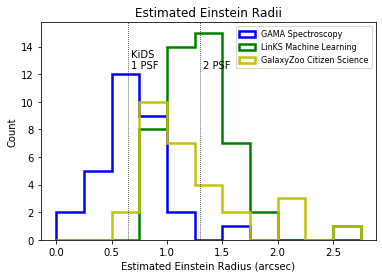

In [99]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Estimated Einstein Radii")

#plt.ylim(0,14.5)

plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5, alpha = 0.95)
#plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.fill_betweenx(x1=0.1, x2=0.2, y=(0,15),# Fill region for false candidates
 #                facecolor="purple", # The fill color
  #               color='purple',       # The outline color
   #              alpha=0.15, # Transparency of the fill
    #            label='NextGen Resolution')

plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 12.4, '1 PSF')
plt.text(0.675, 13.2, 'KiDS')
plt.text(1.325, 12.4, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_three_methods_nextgen.pdf')


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


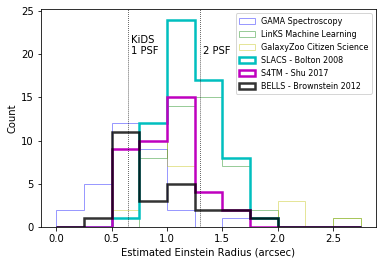

In [100]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
#plt.title("Einstein Radii")
plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='b',label='GAMA Spectroscopy', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='g',label='LinKS Machine Learning', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],color='y',label='GalaxyZoo Citizen Science', histtype = 'step', linewidth=1, alpha=0.4)
plt.hist(slacs.theta_e_sie,bins=11,range=[0.0,2.75],color='c',label='SLACS - Bolton 2008', histtype = 'step', linewidth=2.5)
plt.hist(s4tm.theta_e_sie,bins=11,range=[0.0,2.75],color='m',label='S4TM - Shu 2017', histtype = 'step', linewidth=2.5)
plt.hist(bells.theta_e_sie,bins=11,range=[0.0,2.75],color='k',label='BELLS - Brownstein 2012', histtype = 'step', linewidth=2.5, alpha = 0.8)
plt.legend(loc='upper right', fontsize=8)
plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
plt.text(0.675, 20, '1 PSF')
plt.text(0.675, 21.3, 'KiDS')
plt.text(1.325, 20, '2 PSF')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_other_surveys_060820.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_other_surveys.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 0.75)

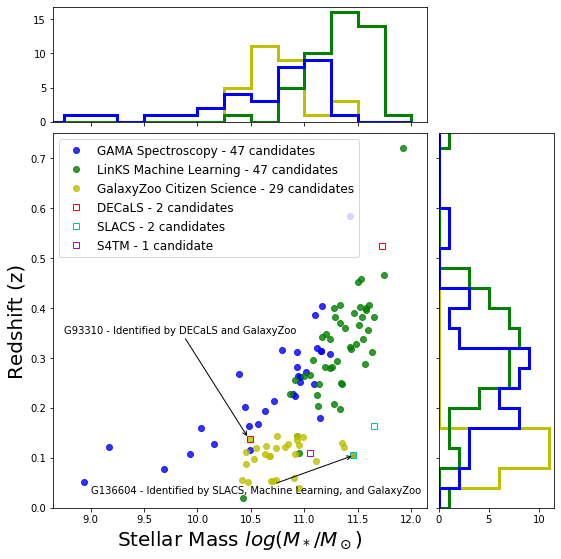

In [62]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science - 29 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
axScatter.plot(np.log10(decals_gama.STELLAR_MASS), decals_gama.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(slacs_gama.STELLAR_MASS), slacs_gama.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
axScatter.plot(np.log10(s4tm_gama.STELLAR_MASS), s4tm_gama.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
            xy=(10.475,0.14), xycoords='data',
            xytext=(8.75,0.35), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
            )
axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
            xy=(11.46,0.105), xycoords='data',
            xytext=(9.0,0.0285), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None)

#axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 0.75)

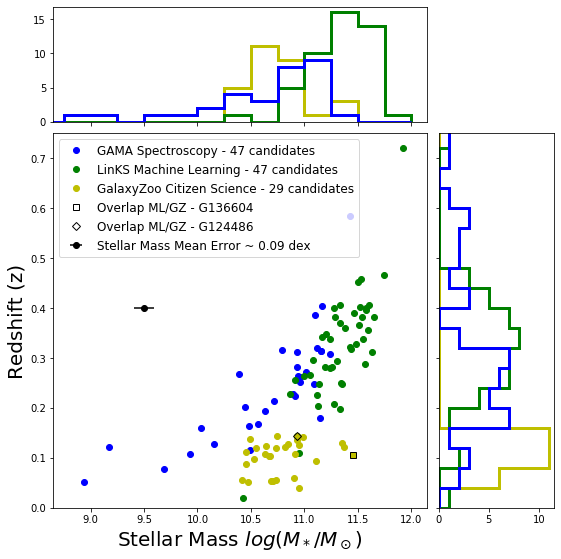

In [90]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))
axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo',label='GAMA Spectroscopy - 47 candidates')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go',label='LinKS Machine Learning - 47 candidates')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo',label='GalaxyZoo Citizen Science - 29 candidates')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

# plot two overlaps
G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(np.log10(G136604.STELLAR_MASS), G136604.Z, 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
axScatter.plot(np.log10(G124486.STELLAR_MASS), G124486.Z, 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
axScatter.errorbar(9.5, 0.4,  
                   xerr= 0.09,
                  fmt = 'o',
                   color = 'black',
                   solid_capstyle = 'round',
                  label = 'Stellar Mass Mean Error ~ 0.09 dex')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(zoo.STELLAR_MASS)-0.5, max(zoo.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z1, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_overlaps.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


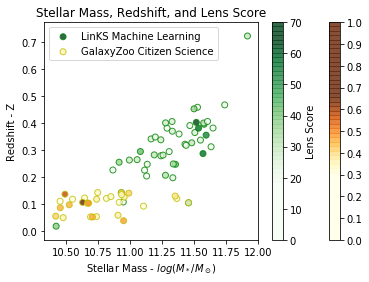

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
p1 = ax1.scatter(np.log10(mac.STELLAR_MASS), 
                mac.Z, 
                c = mac.SCORE, 
                cmap = "Greens", 
                edgecolors = 'g',
                alpha = 0.8,
                label='LinKS Machine Learning')
p2 = ax2.scatter(np.log10(zoo.STELLAR_MASS), 
                  zoo.Z, 
                  c = zoo.LENS_SCORE, 
                  cmap = "YlOrBr", 
                  edgecolors = "y",
                alpha = 0.8,
                label='GalaxyZoo Citizen Science')
plt.cbar = plt.colorbar(p2,
                        shrink=1,
                        orientation='vertical',
                       boundaries=(np.linspace(0, 1, 50)),
                       ticks = ([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])) #, anchor=(0,1.5))
plt.cbar = plt.colorbar(p1, 
                        shrink=1, 
                        orientation='vertical',
                       boundaries=(np.linspace(0, 70, 50)),
                       ticks = ([0, 10, 20, 30, 40, 50, 60, 70])) #, anchor=(0,1.5)
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - $log(M_*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass, Redshift, and Lens Score")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/mac_zoo_scores_mass_redshift.png')
plt.legend()

plt.legend()
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/mac_zoo_scores_mass_redshift.pdf')


plt.show()


In [86]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
#hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/MagPhys.fits')  # open a FITS file
#hdul.verify('fix')
#magphys = hdul[1].data  # assume the first extension is a table
#print(magphys.columns)
#gamaid = magphys.CATAID # Select wanted columns
#mass = magphys.mass_stellar_best_fit
#z = magphys.Z

#gama_list = list(zip(gamaid,mass,z)) # zip to list

#gama_mass = pd.DataFrame(gama_list, columns = ['GAMA_ID','STELLAR_MASS','Z']) # create DF


/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/cosmology/funcs.py:124: UserWarning: fval is not bracketed by func(zmin) and func(zmax). This means either
there is no solution, or that there is more than one solution between
zmin and zmax satisfying fval = func(z).
  zmin and zmax satisfying fval = func(z).""")
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


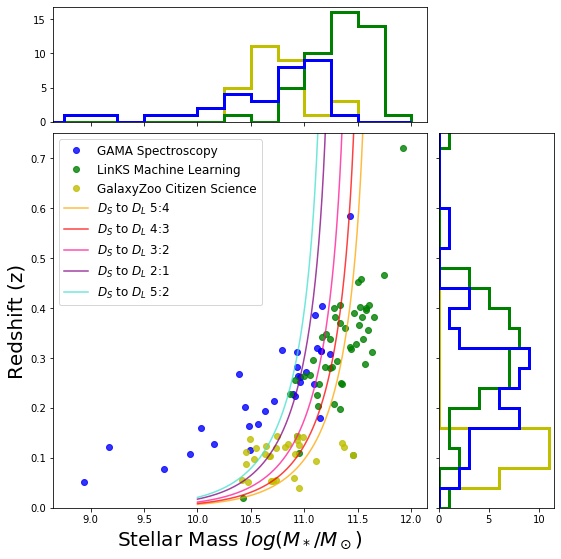

In [102]:
M_stellar = np.linspace(10**(10), 10**(11.75), 1000)
#print(M_stellar)
M = M_stellar/(0.46 - 0.13 * (np.log10(M_stellar) - 11))
#print(M)
M_prime_1_2 = 1 / (2*10**(8.09)) * M
M_prime_3_2 = 1 / (3*10**(8.09)) * M
M_prime_5_2 = 1 / ((5/3) * 10**(8.09)) * M
M_prime_4_3 = 1 / (4 * 10**(8.09)) * M
M_prime_5_4 = 1 / (5 * 10** (8.09)) * M

#print(M_prime)
z_1_2 = np.zeros(len(M))
z_3_2 = np.zeros(len(M))
z_5_2 = np.zeros(len(M))
z_4_3 = np.zeros(len(M))
z_5_4 = np.zeros(len(M))

for i in range(len(M)):
    z_1_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_1_2[i] * u.Mpc, zmax = 2.0)
    z_3_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_3_2[i] * u.Mpc, zmax = 2.0)
    z_5_2[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_2[i] * u.Mpc, zmax = 2.0)
    z_4_3[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_4_3[i] * u.Mpc, zmax = 2.0)
    z_5_4[i] = z_at_value(cosmo.angular_diameter_distance, M_prime_5_4[i] * u.Mpc, zmax = 2.0)

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))


axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

axScatter.plot(np.log10(M_stellar), z_5_4, 
               color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_4_3, 
               color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_3_2, 
               color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_1_2, 
               color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
axScatter.plot(np.log10(M_stellar), z_5_2, 
               color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None,
      #            color = 'b',
       #           alpha = 0.5)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/fiber_radius_mass_curves.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


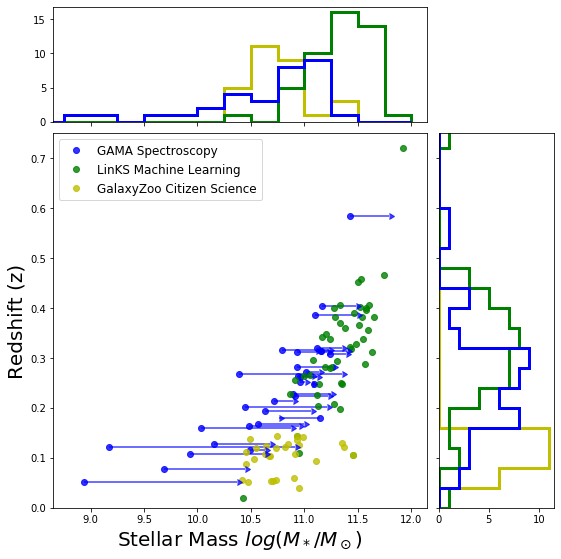

In [103]:
# REDO FIBER RADIUS MASS BEFORE RUNNING THIS!

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# the scatter plots
axScatter.set_xlim((min(np.log10(zoo.STELLAR_MASS))-0.5, max(np.log10(mac.STELLAR_MASS))+0.5))
axScatter.set_ylim((min(mac.Z)-0.05, max(mac.Z)+0.05))


axScatter.plot(np.log10(spec.STELLAR_MASS), spec.z_lens, 'bo', alpha = 0.8, label='GAMA Spectroscopy')
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), mac.Z, 'go', alpha = 0.8, label='LinKS Machine Learning')
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), zoo.Z, 'yo', alpha = 0.8, label='GalaxyZoo Citizen Science')
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECaLS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

#text.Annotation('G93310', xycoords='data', xytext=(9.75,0.325), xy=(10.35,0.14), arrowprops=None)
#axScatter.annotate("G93310 - Identified by DECaLS and GalaxyZoo",
 #           xy=(10.475,0.14), xycoords='data',
  #          xytext=(8.75,0.35), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                       connectionstyle="arc3"),
     #       )
#axScatter.annotate("G136604 - Identified by SLACS, Machine Learning, and GalaxyZoo",
 #           xy=(11.46,0.105), xycoords='data',
  #          xytext=(9.0,0.0285), textcoords='data',
   #         arrowprops=dict(arrowstyle="->",
    #                        connectionstyle="arc3"),
     #       )
        
# fiber radius mass curves

#axScatter.plot(np.log10(M_stellar), z_5_4, 
 #              color = 'orange', label = '$D_S$ to $D_L$ 5:4', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_4_3, 
 #              color = 'red', label = '$D_S$ to $D_L$ 4:3', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_3_2, 
 #              color = 'deeppink', label = '$D_S$ to $D_L$ 3:2', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_1_2, 
 #              color = 'purple', label = '$D_S$ to $D_L$ 2:1', alpha = 0.75)#, linestyle = '--')
#axScatter.plot(np.log10(M_stellar), z_5_2, 
 #              color = 'turquoise', label = '$D_S$ to $D_L$ 5:2', alpha = 0.75)#, linestyle = '--')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
#axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
 #                  spec.z_lens, 
  #                 xerr=np.log10(spec.max_stellar_mass_chabrier)-np.log10(spec.STELLAR_MASS),
   #               fmt = 'none',
    #              xlolims = True,
     #             label = None, color = 'k',
      #            alpha = 0.5)
axScatter.errorbar(abs(np.log10(spec.STELLAR_MASS)), 
                   spec.z_lens, 
                   xerr=np.log10(spec.fiber_radius_stellar_mass)-np.log10(spec.STELLAR_MASS),
                  fmt = 'none',
                  xlolims = True,
                  label = None,
                  color = 'b',
                  alpha = 0.75)



axScatter.legend(loc='upper left', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(spec.STELLAR_MASS)-0.5, max(spec.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(mac.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.8],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/fiber_radius_mass_error_bars.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/041220_all_methods_other_surveys.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_other_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_max_mass.pdf')